In [1]:
import pandas as pd 
import yfinance as yf
import talib

ModuleNotFoundError: No module named 'talib'

In [2]:
print(pd)

<module 'pandas' from 'C:\\Users\\JYB\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python39\\site-packages\\pandas\\__init__.py'>


In [4]:
import pandas as pd 
import yfinance as yf
import numpy as np

# download data 
df = yf.download("AAPL", 
                 start="2000-01-01", 
                 end="2010-12-31", 
                 auto_adjust=False,
                 progress=False)

# keep only the adjusted close price
df = df.loc[:, ["Adj Close"]] \
       .rename(columns={"Adj Close": "adj_close"})

# calculate simple returns
df["log_rtn"] = np.log(df["adj_close"]/df["adj_close"].shift(1))

# remove redundant data
df = df.drop("adj_close", axis=1) \
       .dropna(axis=0)

df.head()

,log_rtn
Date,
2000-01-04,-0.088078
2000-01-05,0.014527
2000-01-06,-0.090514
2000-01-07,0.046281
2000-01-10,-0.017744


In [5]:
import pandas as pd 
import numpy as np

In [6]:
def realized_volatility(x):
    return np.sqrt(np.sum(x**2))

In [7]:
df_rv = (
    df.groupby(pd.Grouper(freq="M"))
    .apply(realized_volatility)
    .rename(columns={"log_rtn": "rv"})
)

In [8]:
df_rv.rv = df_rv["rv"] * np.sqrt(12)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

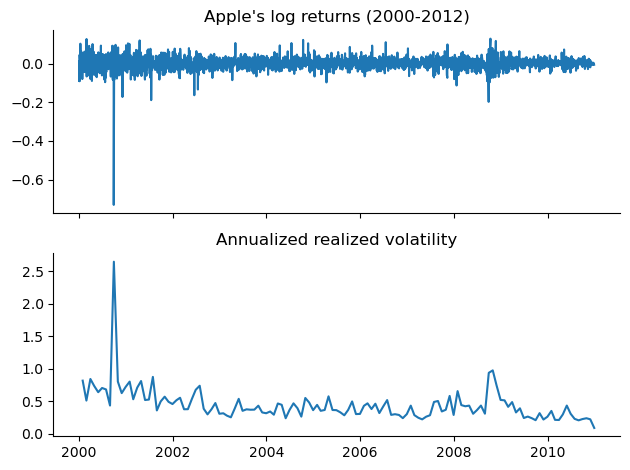

In [10]:
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(df)
ax[0].set_title("Apple's log returns (2000-2012)")
ax[1].plot(df_rv)
ax[1].set_title("Annualized realized volatility")

sns.despine()
plt.tight_layout()
# plt.savefig('images/figure_2_5', dpi=200)

In [13]:
import pandas as pd
import numpy as np
import nasdaqdatalink

ModuleNotFoundError: No module named 'nasdaqdatalink'

ERROR: Could not find a version that satisfies the requirement nasdaqdatalink (from versions: none)
ERROR: No matching distribution found for nasdaqdatalink
